## Compare finishing techniques (Half-Moons)

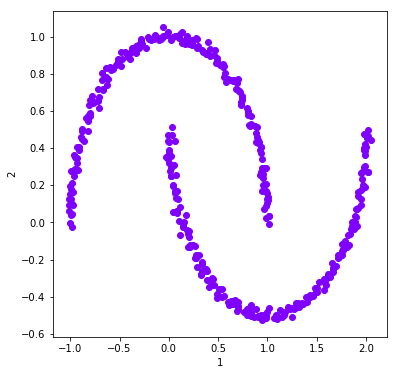

In [1]:
# Reproduce Ana Fred's Majority voting solution to stabilizing KMeans clustering using OpenEnsembles

#%matplotlib inline
#import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
from sklearn import datasets
import openensembles as oe


n_samples = 400
X, y = datasets.make_moons(n_samples=n_samples, shuffle=True, noise=0.02, random_state=None)
df = pd.DataFrame(X)

dataObj = oe.data(df, [1,2])
dataObj.plot_data('parent')



## Example of using OpenEnsembles to create and visualize a single solution

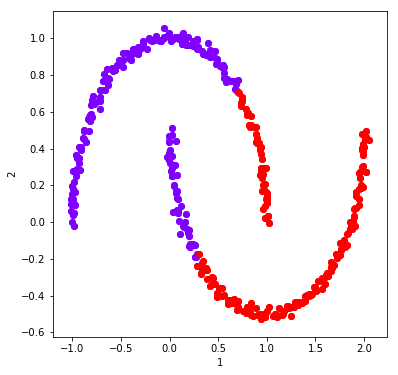

In [7]:
#Plot a single solution 
# default Scikit-learn settings have built in some determinism using Ana Fred's principals, so we have to override those

c = oe.cluster(dataObj) 
K = 2
name = 'kmeans'
c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
dataObj.plot_data('parent', class_labels=c.labels['kmeans'])


## Plot convergence towards solution

In [4]:
# Build towards a majority voting that finds the two continuous partitions
c = oe.cluster(dataObj) 
K = 20 
numIterations = 50
c_MV_arr = []
fig_arr = []
modulo = 1
sil_arr = []
det_arr = []
num_clusters = []

for i in range(1,numIterations):
    name = 'kmeans_' + str(i)
    c.cluster('parent', 'kmeans', name, K, init = 'random', n_init = 1)
    if not i % modulo:
        x = c.finish_majority_vote(threshold=0.5)
        c_MV_arr.append(x)
        num_clusters.append(len(x.clusterNumbers['majority_vote']))
        v = oe.validation(dataObj, x)
        
        #A compactness metric
        validation_name = 'silhouette'
        v.calculate(validation_name, 'majority_vote', 'parent')
        name = validation_name+'_parent_majority_vote'
        sil_arr.append(v.validation[name])

        #A metric for contiguousness
        validation_name = 'point_biserial'
        v.calculate(validation_name, 'majority_vote', 'parent')
        name = validation_name+'_parent_majority_vote'
        det_arr.append(v.validation[name])

#        fig_arr.append(dataObj.plot_data('parent', class_labels=c_MV_arr[-1].labels['majority_vote']))
    #add the calculation of two metrics using the solution -- one that awards contiguousness and one that awards compactness
        
        

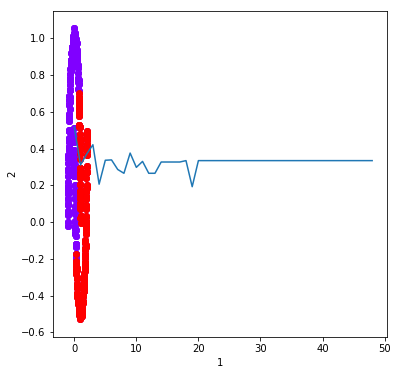

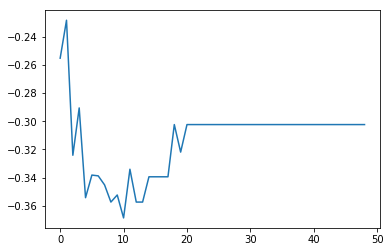

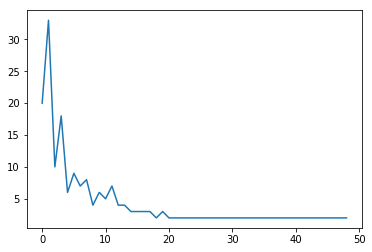

In [5]:
plt.plot(sil_arr)
plt.show()

plt.plot(det_arr)
plt.show()

plt.plot(num_clusters)
plt.show()

In [ ]:
#calculate the validation on parent data
source_name = 'parent'
validation_name= 'det_ratio' #determinant ratio is a measure of connectedness
for solution in c.labels:
    v.calculate(validation_name, solution, source_name)

v_mm = oe.validation(dataObj,c_MM)
v_mm.calculate(validation_name, 'mixture_model', 'parent')


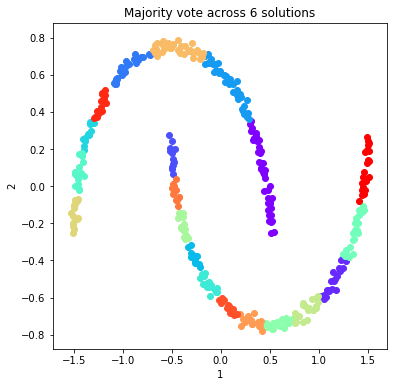

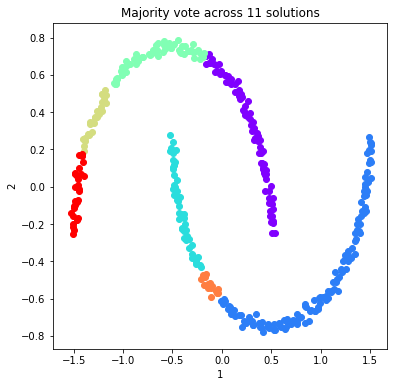

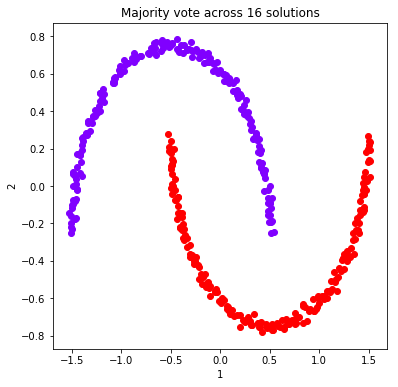

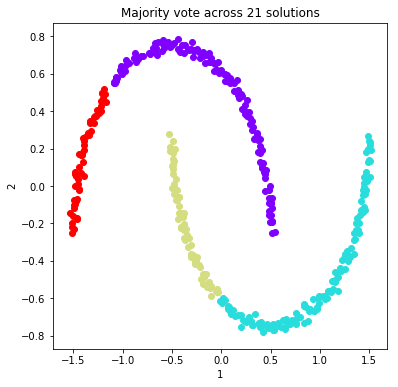

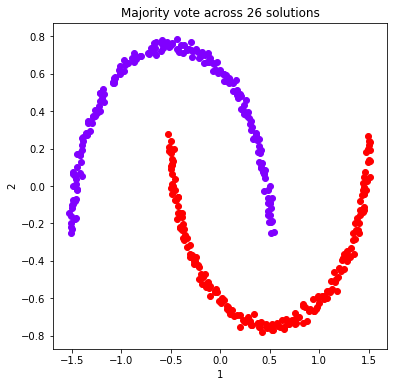

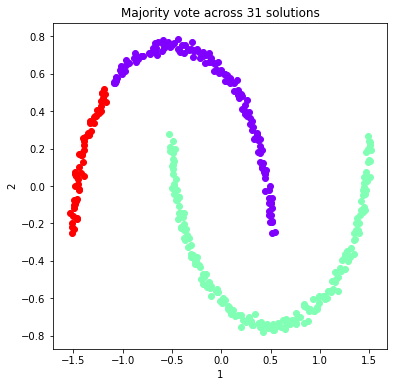

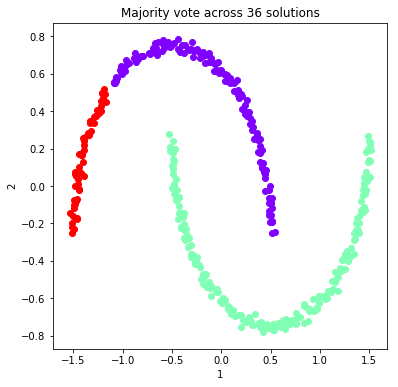

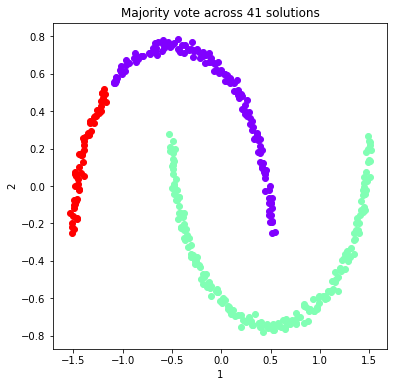

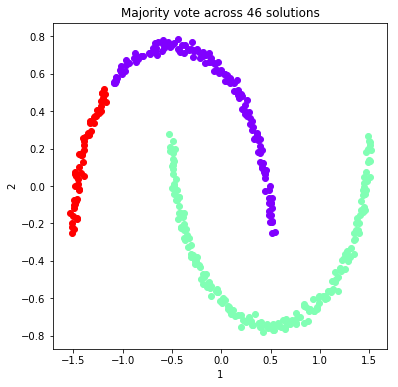

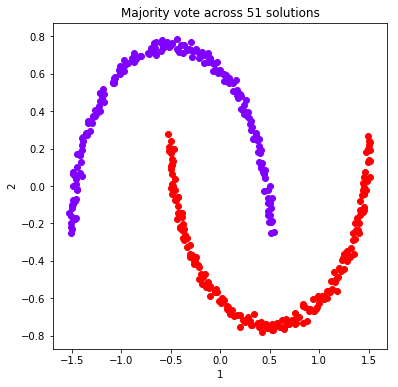

In [55]:
skip = 5
for ind in range(0, len(c_MV_arr), skip):

    fig = dataObj.plot_data('parent', class_labels=c_MV_arr[ind].labels['majority_vote'])
    plt.title('Majority vote across %d solutions'%(modulo+modulo*ind+skip))
    plt.show()


In [13]:
c_MV_arr[-1].labels

{'majority_vote': array([1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
        1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
        1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1,
        2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1,
        1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
        1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
        2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
        2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 

In [15]:
c.clusterNumbers

{'kmeans_1': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_10': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_11': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_12': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_13': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_14': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_15': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_16': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 'kmeans_